In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def row_normalize(K):
    return (K.T/(sum(K,axis=1))).T


In [3]:
n=200  # Kernel size is 2*n+2
X=arange(0,1+0.1/n,1/n)
X.shape

(201,)

<Figure size 432x288 with 0 Axes>

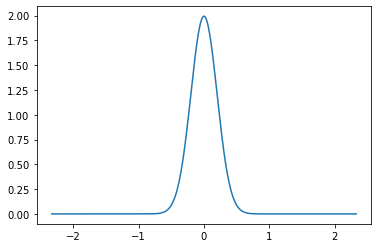

<Figure size 432x288 with 0 Axes>

In [4]:
#define kernel
from scipy.stats import norm
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 2*n+2)
kernel_scale=0.2
kernel = norm(scale=kernel_scale).pdf(x)
plot(x,kernel)
figure()
## define matrix

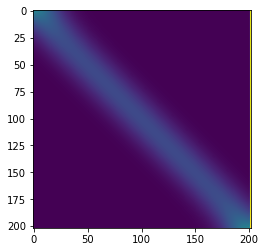

In [5]:
K=np.zeros([n+2,n+2])
for i in range(n+2):
    for j in range(n+2):
        K[i,j]=kernel[int(i-j+n)]

K=row_normalize(K)
gamma=1e-1
K[:,-1]= gamma

K=row_normalize(K)

imshow(K)

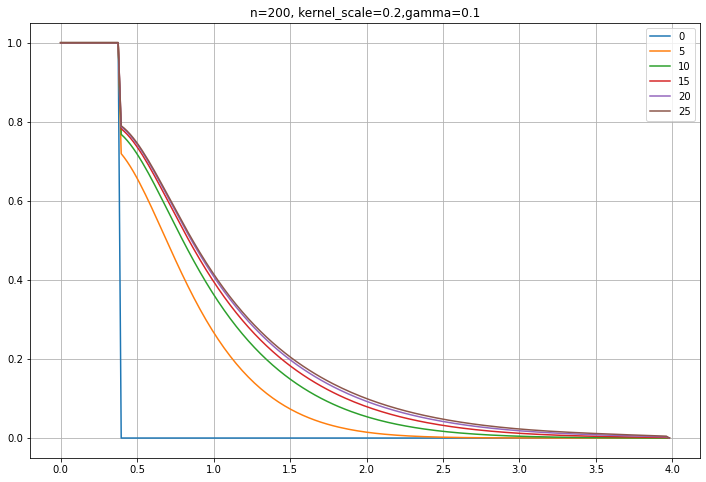

In [6]:
figure(figsize=[12,8])
V=zeros(n+2)
V[0:int(n/10)]=1; 
V[-1]=0
X=arange(0,4,4/V.shape[0])
for i in range(30):
    if i % 5 ==0 :
        plot(X,V,label=str(i))
    V=np.dot(V,K)
    V[0:int(n/10)]=1;  V[-1]=0
legend()
grid()
title(f'n={n}, kernel_scale={kernel_scale},gamma={gamma}');